# Dataset Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from sklearn import datasets
from sklearn.utils import shuffle
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, accuracy_score, precision_score, recall_score, f1_score

In [5]:
df_test = pd.read_csv('emnist-letters-test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train = pd.read_csv('emnist-letters-train.csv', header=None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_merge = pd.concat([df_test, df_train])

samples_per_class = 100

df_balanced = pd.concat([
    df_merge[df_merge[0] == class_id].sample(samples_per_class, random_state=42)
    for class_id in range(1, 27)
])

print(df_balanced)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
96       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
42329    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
584      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
67600    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
58146    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5583    26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
33927   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88423   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
16008   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30594   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
96      

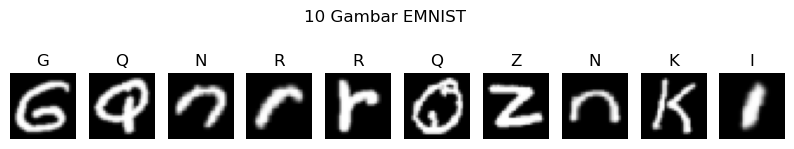

In [18]:
import numpy as np
import matplotlib.pyplot as plt

labels = df_train.iloc[:, 0].values
images = df_train.iloc[:, 1:].values

selected_labels = []
selected_images = []

for class_label in range(1, 27):  # 1–26 for EMNIST letters
    class_indices = np.where(labels == class_label)[0]
    selected_idx = np.random.choice(class_indices, 100, replace=False)
    selected_images.append(images[selected_idx])  # FIXED
    selected_labels.append(labels[selected_idx])  # FIXED

# Stack correctly
X = np.vstack(selected_images)       # shape: (2600, 784)
y = np.hstack(selected_labels)       # shape: (2600,)

# Show random 10 images
random_indices = np.random.choice(len(X), size=10, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    image = X[idx].reshape(28, 28).T
    label = chr(int(y[idx]) + 64)    # FIXED: int() to ensure scalar
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(label)

plt.suptitle("10 Gambar EMNIST")
plt.show()


In [20]:
df_balanced = df_balanced.sample(frac=1, random_state=47).reset_index(drop=True)
df_balanced

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2596,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2598,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2080, 784)
Test size: (520, 784)


# Feature Extraction

In [41]:
hog_param = { 'orientations': 6, 'pixels_per_cell': (4,4), 'cells_per_block': (4, 4), 'block_norm': 'L2' }

def extract_hog_features(images):
    features = []
    for img in images:
        image = img.reshape(28, 28).T  # transpose EMNIST
        hog_features = hog(image, **hog_param)
        features.append(hog_features)
    return np.array(features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print(f"HOG feature size (train): {X_train_hog.shape}")
print(f"HOG feature size (test): {X_test_hog.shape}")

HOG feature size (train): (2080, 1536)
HOG feature size (test): (520, 1536)


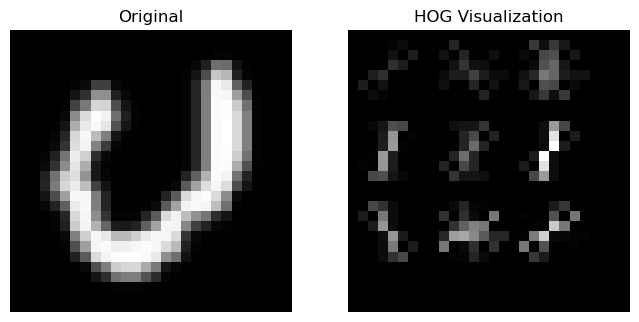

In [42]:
img_example = X_train[0].reshape(28, 28).T

# Ekstrak dan tampilkan HOG
features, hog_image = hog(img_example,
                          orientations=9,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          block_norm='L2-Hys',
                          transform_sqrt=True,
                          visualize=True)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_example, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("HOG Visualization")
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.show()


# Classification

In [46]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001]
}

In [47]:
svm_model = SVC()

In [48]:
svc = SVC()
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,        
                           verbose=2,
                           n_jobs=-1)   

In [52]:
start_time = time.time()
grid_search.fit(X_train_hog, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [53]:
end_time = time.time()

In [54]:
print(f"\nGrid Search Time Training: {end_time - start_time:.2f} second")
print("Best Parameters:", grid_search.best_params_)
print("Best Accuration:", grid_search.best_score_)


Grid Search Time Training: 105.05 second
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuration: 0.791830061282511


In [58]:
y_pred = grid_search.predict(X_test_hog)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.86      0.95      0.90        20
           3       1.00      0.95      0.97        20
           4       0.88      0.70      0.78        20
           5       1.00      0.95      0.97        20
           6       0.95      0.95      0.95        20
           7       0.62      0.65      0.63        20
           8       1.00      0.90      0.95        20
           9       0.53      0.45      0.49        20
          10       0.67      0.80      0.73        20
          11       0.89      0.85      0.87        20
          12       0.55      0.60      0.57        20
          13       0.94      0.75      0.83        20
          14       0.68      0.75      0.71        20
          15       0.86      0.90      0.88        20
          16       0.94      0.85      0.89        20
          17       0.60      0.60      0.60       

# Evaluation

In [61]:
print("=== Set Evaluation ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1-Score :", f1_score(y_test, y_pred, average='macro'))

=== Set Evaluation ===
Accuracy : 0.8211538461538461
Precision: 0.8276727350450259
Recall   : 0.8211538461538461
F1-Score : 0.8217000314884315


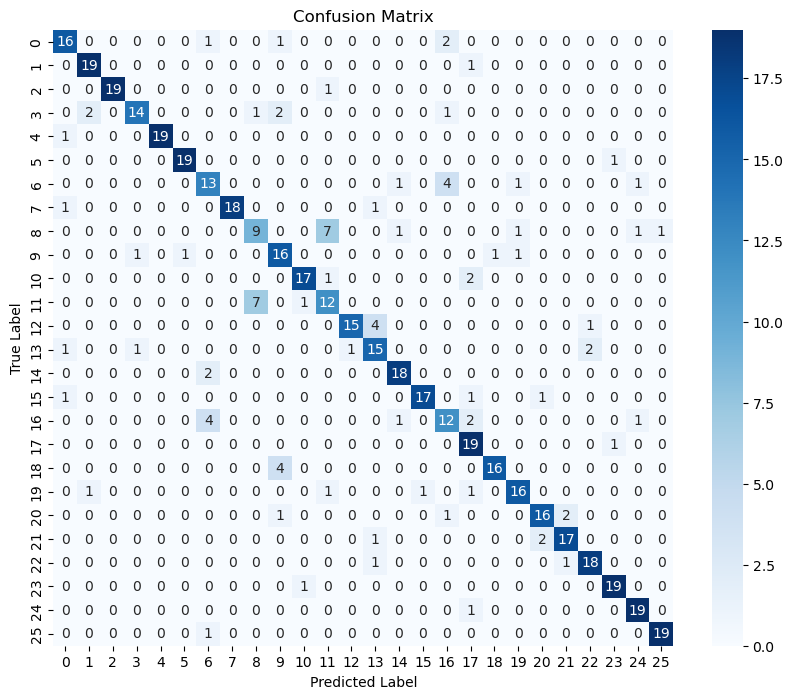

In [74]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

=== Traning Set Evaluation ===

Detailed Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.96      0.97        80
           2       0.99      0.99      0.99        80
           3       0.99      0.99      0.99        80
           4       0.99      0.95      0.97        80
           5       0.99      0.99      0.99        80
           6       1.00      1.00      1.00        80
           7       0.96      0.91      0.94        80
           8       0.94      0.97      0.96        80
           9       0.78      0.86      0.82        80
          10       0.99      0.97      0.98        80
          11       1.00      0.95      0.97        80
          12       0.79      0.78      0.78        80
          13       0.98      0.99      0.98        80
          14       0.96      0.99      0.98        80
          15       0.95      1.00      0.98        80
          16       1.00      0.96      0.98        80
          17    

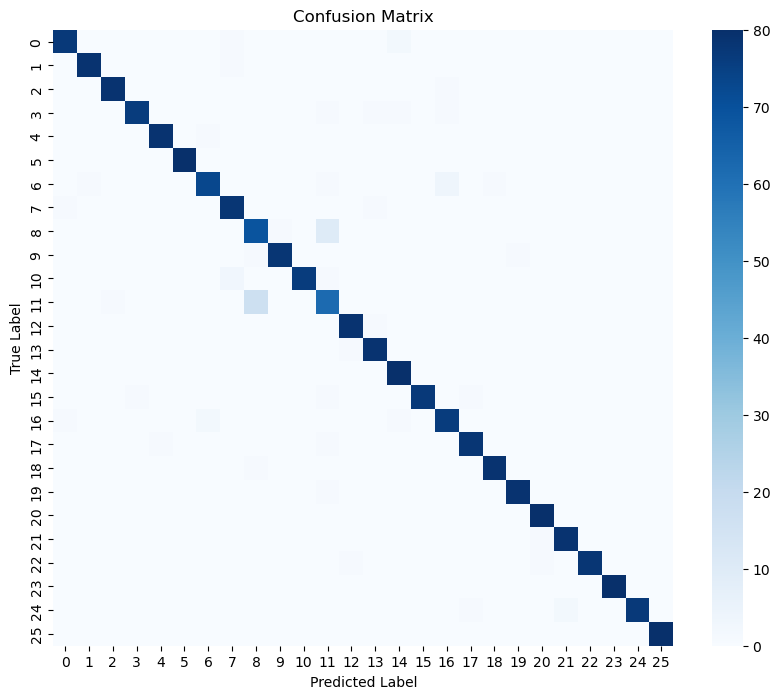

In [82]:
clf = SVC(kernel='rbf', C=10, gamma=0.01)
clf.fit(X_train_hog, y_train)

y_train_pred = clf.predict(X_train_hog)

print("=== Traning Set Evaluation ===")
print("\nDetailed Classification Report:\n", classification_report(y_train, y_train_pred))
print("Accuracy :", accuracy_score(y_train, y_train_pred ))
print("Precision (macro):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_train, y_train_pred, average='macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=False, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()